# Hypothesis Testing

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

# Simulation Based Approach

- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: 
    - Create a boolean pandas series
    - Model win with true and lose with false
    - Take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


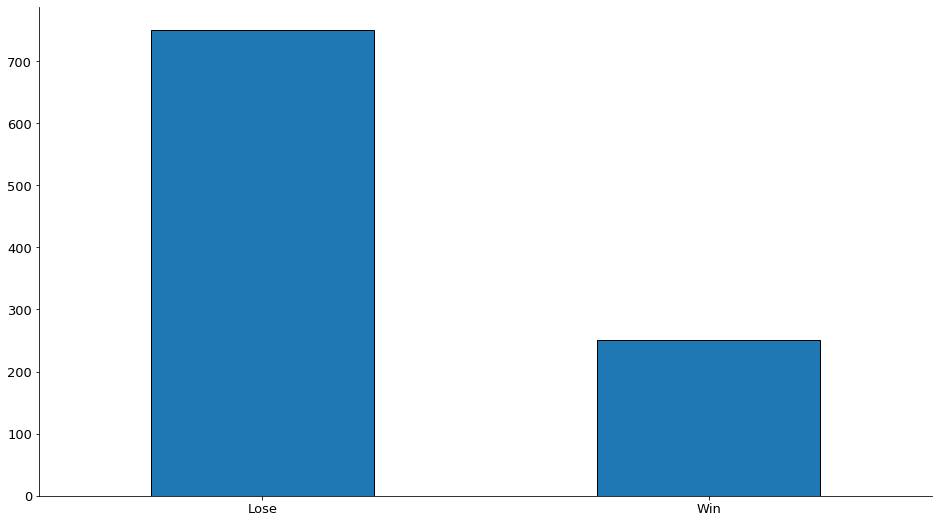

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

- Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory:
    We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

    Examples of biased samples:

    - non-response: people that don't respond are a diff population
    - undercoverage: some groups aren't well represented
    - voluntary: people volunteer for surveys
    - leading questions
    - social desirability
- Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [4]:
n = 25
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom. 

- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom. 

- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [5]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

- Theory

    The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

    If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

    That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution
    

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

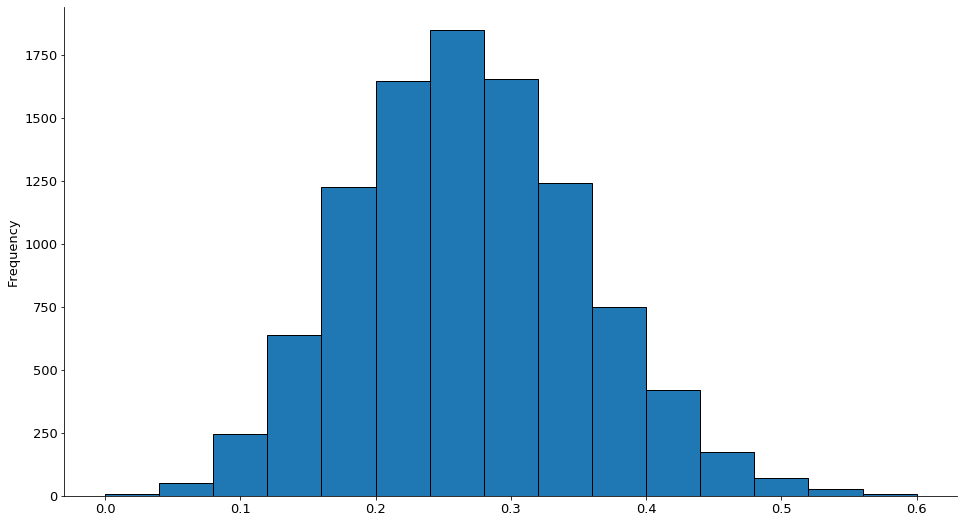

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

- Theory:

    The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

    The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

# Mini Exercise: CLT

1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls. 


2. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list. 


3. Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [8]:
roll_dice = pd.Series([1]*1666+ [2]*1666+ [3]*1666+ [4]*1666+ [5]*1666+ [6]*1666)

In [11]:
n = 1_000
roll_dice.sample(n).mean()

3.54

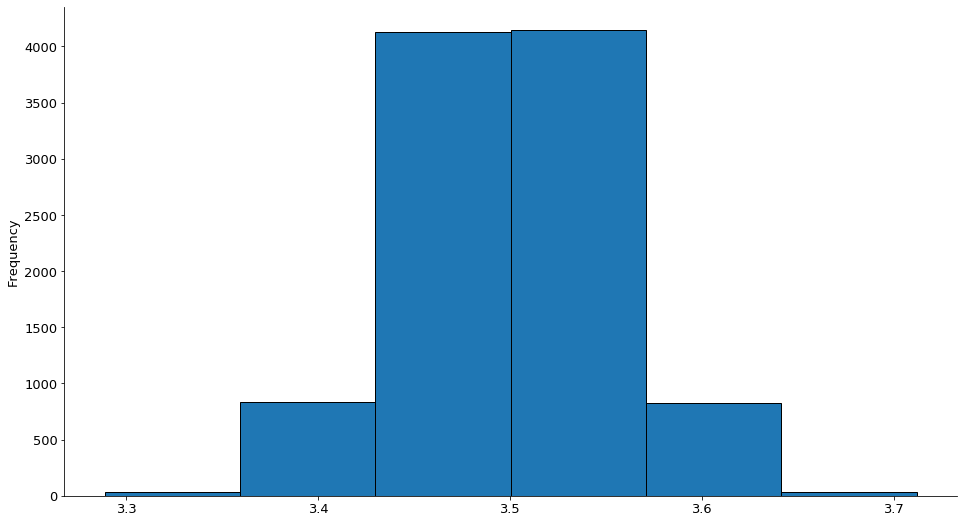

In [12]:
roll_dice_rates = pd.Series([roll_dice.sample(n).mean() for _ in range(10_000)])
roll_dice_rates.plot.hist(bins=6)

In [13]:
roll_dice1 = np.random.choice([1,2,3,4,5,6], size=(10_000 ,2))
roll_dice1.mean()

3.5014

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.


- The mean of the sampling distribution of the sample means will be the "true" mean 

- The variance of the sampling distribution is the population variable divided by the sample size 

- The standard deviation of the sampling distribution is √ pq/n (for our example), aka the standard error

In [16]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [17]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0137
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:

- Confidence intervals for population parameter estimates (e.g. estimating the population mean)
    - as n goes up, interval becomes smaller
    - as certainty goes up, interval becomes larger
    - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean) 
    

- Hypothesis testing
    - One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [19]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

# Null and Alternative Hypothesis

- $H0$ : status quo: no difference or no effect
- $Ha$ : alternative: there is a difference or effect
- whether $Ha$ is ≠, <, >, determines one-tailed vs two-tailed test
    - < or > == one-tailed
    - ≠ == two-tailed

# Mini Exercise: Null + Alternate Hypothesis and Errors

For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.


# Are the average grades in web development vs data science classes different?


- $H_0$: the average grades in web dev vs DS are the same
- $H_a$: the average grades in web dev vs DS are different 


- True Positive: We reject $H_0$, average grades are differnt and its correct
- False Positive: We reject $H_0$, average grades are differnt and its incorrect
- False Negative: We fail to reject $H_0$, data showed that average grades are different, but its incorrect 
- True Negative: We fail to reject $H_0$, data showed that average grades are different, and its correct 

# Is there a relationship between how early a student shows up to class and their grade?

- $H_0$: no relationship on how early a students shows up to class and their grade
- $H_a$: there is a relationship on how early a students shows up to class and their grade  


- True Positive: We reject $H_0$, there is a relationship and its correct
- False Positive: We reject $H_0$, there is a relationship and its incorrect
- False Negative: We fail to reject $H_0$, data showed that there is no relationship, but its incorrect 
- True Negative: We fail to reject $H_0$, data showed that there is no relationship, and its correct 

# Are web dev or data science students more likely to be coffee drinkers?  

- $H_0$: Students are more likely to be coffee drinkers
- $H_a$: Students are not more likely to be coffee drinkers  


- True Positive: We reject $H_0$, data shows not more likely and its correct
- False Positive: We reject $H_0$, data shows not more likely and its incorrect
- False Negative: We fail to reject $H_0$, data shows that there it is more likely, but its incorrect 
- True Negative: We fail to reject $H_0$, data shows that there it is more likely, and its correct 

# Overview Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


Define:
    - Null hypothesis
    - Alternative hypothesis

Give an example of:
    - True positive
    - True negative
    - Type I error
    - Type II error

# - Has the network latency gone up since we switched internet service providers?

- $H_0$: the network latency is the same since the ISP switch.
- $H_a$: the new ISP has higher latency 


- True Positive: We reject $H_0$, our latency is not the same since the switch
- False Positive: We reject $H_0$, we thought latency was not the same, however that was incorrect
- False Negative: We fail to reject $H_0$:Data showed that latency was higher and it was incorrect 
- True Negative: Data shows that latency is higher and it was correct

# - Is the website redesign any good?

- $H_0$: the number of click throughs since the site redesign has remained the same 
- $H_a$: there are more click throughs since the site redesign  


- True Positive: reject $H_0$, we conclude that the redesign helped, and it really did
- False Positive: reject $H_0$, we conclude that the redesign helped, but really it didn't
- False Negative: fail to reject $H_0$, we conclude the redesign did not help, but really it did
- True Negative: fail to reject $H_0$, we conclude the redesign did not help, and it really didn't

# - Is our television ad driving more sales?

- $H_0$: Product did not sell any better when running advert
- $H_a$: Product did sell better when running advert
    
- True Positive: reject $H_0$; we conclude that the ad helped, and it did
- False Positive: reject $H_0$; we conclude that the advert helped sales, but really it didn't
- False Negative: fail to reject $H_0$; we conclude that the advert did not help, but really it did
- True Negative: fail to reject $H_0$: we conclude the advert did not help sales, and it didn't

# T-Test Section

In [30]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [31]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import pydataset
import env

ModuleNotFoundError: No module named 'urlparse'

- $H_0$: the average home sale time is the same for office 1 and office 2
- $H_a$: the average home sale time is smaller for office 1 than office 2

In [ ]:
n1 = 40
xbar1 = 90
s1 = 15

n2 = 50
xbar2 = 100
s2 = 20

t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

one_tailed_p = p / 2
one_tailed_p

In [ ]:
degf = n1 + n2 - 2

dist = stats.t(degf)

x = np.linspace(-3.5, 3.5)
y = dist.pdf(x)

plt.figure(figsize=(12, 9))
plt.plot(x, y)
plt.vlines([-2, 2], 0, .3)

In [ ]:
print(f'''
t = {t:.04f}
p = {p:.04f}

Because p ({one_tailed_p:.4f}) < alpha (.05), we reject the null hypothesis that
the average home sale time is the same for office 1 and office 2.
'''.strip())

In [ ]:
# Load the mpg dataset and use it to answer the following questions:

In [32]:
mpg = pydataset.data('mpg')

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- $H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999
- $H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [ ]:
x1 = mpg[mpg.year == 1999].hwy
x2 = mpg[mpg.year == 2008].hwy

x1.var(), x2.var()

In [ ]:
t, p = stats.ttest_ind(x1, x2)
p

In [ ]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null hypothesis that there
is no difference in fuel-efficency in cars from 2008 and 1999.
''')

In [ ]:
# Are compact cars more fuel-efficient than the average car?

- $H_0$: there is no difference in fuel-efficiency between compact cars and the population average fuel-efficiency
- $H_a$: there is a difference in fuel-efficiency between compact cars and the population average fuel-efficiency

In [ ]:
x = mpg[mpg['class'] == 'compact'].hwy
mu = mpg.hwy.mean()

t, p = stats.ttest_1samp(x, mu)
print('t=', t)
print('p=', p)

In [ ]:
print(f'''
Because p ({p:.12f}) < alpha (.05), we reject the null hypothesis that there is
no difference in fuel-efficiency between compact cars and the overall average.
''')

In [ ]:
print(f'''
Avg mileage for compact cars: {x.mean():.2f}
Overall average mileage:      {mu:.2f}
''')

In [ ]:
# Do manual cars get better gas mileage than automatic cars?

- $H_0$: there is no difference in gas mileage between manual and automatic cars.
- $H_a$: there is a difference in gas mileage between manual and automatic cars.

In [ ]:
is_automatic_transmission = mpg.trans.str.startswith('auto')

x1 = mpg[is_automatic_transmission].hwy
x2 = mpg[~ is_automatic_transmission].hwy

x1.var(), x2.var()

In [ ]:
t, p = stats.ttest_ind(x2, x1)
print('t=', t)
print('p=', p)

In [ ]:
print(f'''
Becuase p ({p:.5f}) < alpha (.05), we reject the null hypothesis that there
is no difference in gas mileage between manual and automatic cars.
''')

# Correlation

In [ ]:
#1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [33]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
query = '''
SELECT *
FROM customers
JOIN internet_service_types USING(internet_service_type_id)
'''
telco = pd.read_sql(query, url)
telco = telco[telco.total_charges != ""]
telco = telco[telco.total_charges != " "]
telco.total_charges = telco.total_charges.astype(float)

NameError: name 'env' is not defined

In [ ]:
alpha = .05
r, p = stats.pearsonr(telco.tenure, telco.monthly_charges)
print(f'''
r = {r:.4f}
p = {p:.4f}
'''.strip())
if p < alpha:
    print("Reject our null hypothesis")
else:
    print("Fail to reject our null hypothesis")

In [ ]:
# pearson's R of tenure and total charges
alpha = .05
r, p = stats.pearsonr(telco.tenure, telco.total_charges)
if p < alpha:
    print("Reject the null")
    print("There is a linear relationship")
else: 
    print("Fail to reject the null")
r, p

In [ ]:
#2. Use the employees database.

In [ ]:
- Is there a relationship between how long an employee has been with the company and their salary?

In [ ]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT salary, DATEDIFF(curdate(), hire_date) as 'days'
FROM salaries
JOIN employees USING(emp_no)
WHERE to_date > now()
'''
df = pd.read_sql(query, url)
df.head()

In [ ]:
alpha = .05

r, p = stats.pearsonr(df.salary, df.days)
print("R correlation coefficient", r)
print("P value, which is probability of seeing the data given the null hypothes is true", p)

if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

In [ ]:
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
query = """
select emp_no, 
    datediff(curdate(), hire_date) as tenure, 
    count(*) as n_titles
from employees
join titles using(emp_no)
group by emp_no
"""
df = pd.read_sql(query, url)
df.head()

In [34]:
alpha = 0.05
r, p = stats.pearsonr(df.tenure, df.n_titles)
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis.")

print("R is", r)
print("p-value is", p)
print("alpha is", alpha)

NameError: name 'df' is not defined

In [35]:
#3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [36]:
sleep = data('sleepstudy')
sleep

NameError: name 'data' is not defined

In [ ]:
days = sleep.Days
reaction = sleep.Reaction

r, p = stats.pearsonr(days, reaction)
r, p

In [ ]:
alpha = 0.01

p < alpha

# Chi Square

In [ ]:
#1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [ ]:
#2. Choose another 2 categorical variables from the mpg dataset and perform a chi 2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [ ]:
#3. Use the data from the employees database to answer these questions:

In [ ]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [ ]:
# Is an employee's gender independent of whether or not they are or have been a manager?

# More Examples

In [ ]:
# Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.